In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gaussian Distribution (AKA Normal Distribution)

\begin{align}
\ N = \frac{1}{\sigma \sqrt{ 2\pi} } e^{-\frac{(x-\mu)^2}{2 \sigma^2}}  \\
\end{align}

Our goal is to generate normally distributed numbers to form a cluster of points. This means that the x and y values of a point are each normally distributed. We can do this with the Box-Muller Transform.


In [2]:
# Returns y given x, mu, sigma
def gaussian(x, mu=1, sigma=0.3):
    return np.exp(-((x - mu) ** 2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))

## The Box-Muller Transform 
The Box-Muller Transform will generate points around (0,0) that will be distributed normally on both the x, and y axis.
See [here](https://www.alanzucconi.com/2015/09/16/how-to-sample-from-a-gaussian-distribution/) for an in-depth explanation.

1. Generate two values from uniform distribution
\begin{align}
U1 = Unif(0, 1) \\
U2 = Unif(0, 1) 
\end{align}

2. Apply the transform 
\begin{align}
z0 = \sqrt{-2 \log U1}cos(2 \pi U2) \\
z1 = \sqrt{-2 \log U1}sin(2 \pi U2)
\end{align}



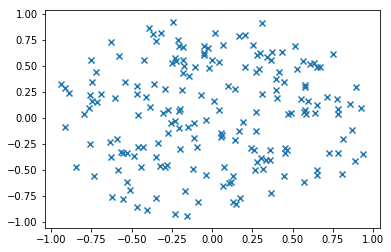

In [3]:
def gen_box_muller(x, y, num_points, max_dist):    
    U1 = np.random.uniform(0, 1, num_points)
    U2 = np.random.uniform(0, 1, num_points)

    z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2).astype(float) + x
    z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2).astype(float) + y
    points = np.stack((z0, z1), axis = 1)
    
    points_filtered = points[np.where(np.sqrt((x-z0)**2 + (y-z1)**2) <= max_dist)]
    
    return points_filtered

points = gen_box_muller(0,0, 500, 1)

z0 = points[:,0]
z1 = points[:,1]

plt.scatter(z0, z1, marker = 'x')

plt.show()

In [4]:
def gen(file, num_clusters, points_min=25, points_max=50, x_min=0, x_max=20, y_min=0, y_max=20, max_dist=1.5):    
    for i in range(num_clusters):
        centre_x = np.random.randint(x_min, x_max, size=1)
        centre_y = np.random.randint(y_min, y_max, size=1)
        num_points = np.random.randint(points_min, points_max, size=1)
        
        points = gen_box_muller(centre_x, centre_y, num_points, max_dist)
        np.savetxt(file, points)
    
        z0 = points[:,0]
        z1 = points[:,1]
        plt.scatter(z0, z1, marker = 'x')
    plt.show()

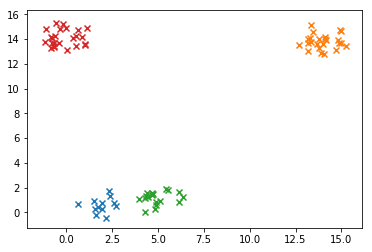

In [5]:
with open('gen_cluster_2.txt', 'w+') as out_file:
    gen(out_file, num_clusters=4)